# `for` Loops

This lesson covers:

* for loops 
* Nested loops 



## Problem: Basic For Loops

Construct a for loop to sum the numbers between 1 and N for any N. A for loop
that does nothing can be written:

```python
n = 10
for i in range(n):
    pass
```


In [3]:
total = 0
n= 10
for i in range(1,n+1):
    total = total + i
print(total)

55


## Problem: Compute a compound return
The compound return on a bond that pays interest annually at rate r is given
by $cr_{t}=\prod_{i=1}^{T}(1+r)=(1+r)^{T}$. Use a for loop compute the total
return for £100 invested today for $1,2,\ldots,10$ years. Store this variable
in a 10 by 1 vector cr. 


In [25]:
import numpy as np
import pandas as pd

investment = 100
r = 0.08
cr = np.ones(10)
cum_ret = 1
for i in range(10):
    cum_ret *= (1+r)
    cr[i] =cum_ret

print(cr)

[1.08       1.1664     1.259712   1.36048896 1.46932808 1.58687432
 1.71382427 1.85093021 1.99900463 2.158925  ]


## Problem: Simulate a random walk

(Pseudo) Normal random variables can be simulated using the command
`np.random.standard_normal(shape)` where `shape` is a tuple (or a scalar)
containing the dimensions of the desired random numbers. Simulate 100 normals
in a 100 by 1 vector and name the result `e`. Initialize a vector `p`
containing zeros using the function zeros. Add the 1st element of `e` to the
first element of `p`. Use a for loop to simulate a process
$y_{i}=y_{i-1}+e_{i}$. When finished plot the results using

```python
%matplotlib inline

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(16,6))

plt.plot(y)
```


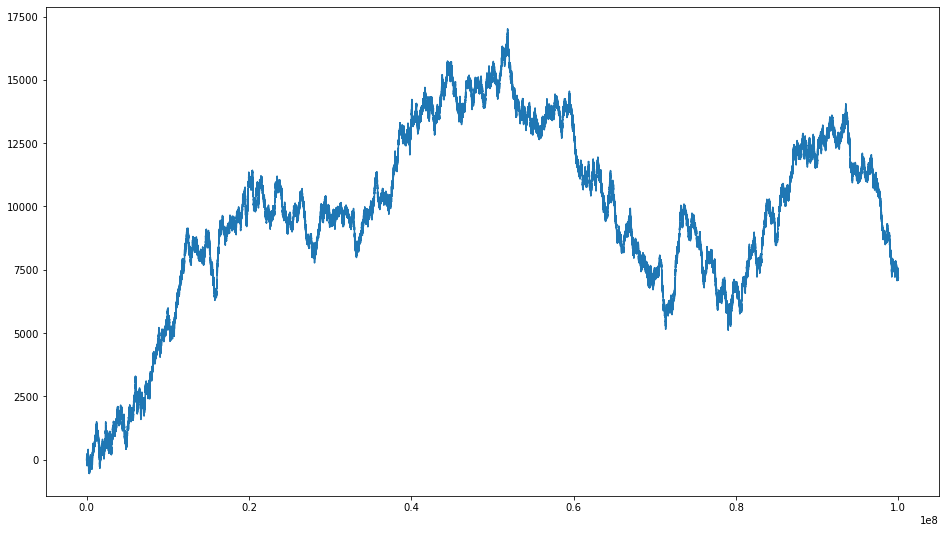

In [69]:
n = 100000
e = np.random.standard_normal(n)
p = np.zeros(n)
for i in range(1,n):
    p[i] = p[i-1] + e[i]

%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (16,9))

plt.plot(p)

## Problem: Nested Loops

Begin by loading momentum data used in an earlier lesson. Compute a
22-day moving-window standard deviation for each of the columns. Store
the value at the end of the window.

When finished, make sure that `std_dev` is a `DataFrame` and 
plot the annualized percentage standard deviations using:

```python
ann_std_dev = 100 * np.sqrt(252) * std_dev
ann_std_dev.plot()
```  

In [61]:
# Setup: Load the momentum data

import pandas as pd
momentum = pd.read_csv("data/momentum.csv", index_col="date", parse_dates=True)
momentum = momentum / 100  # Convert to numeric values from percentages

In [74]:
nobs = momentum.shape[0]
ncols = momentum.shape[1]

std_dev = momentum.copy()
std_dev.loc[:,:] = np.nan

<AxesSubplot:xlabel='date'>

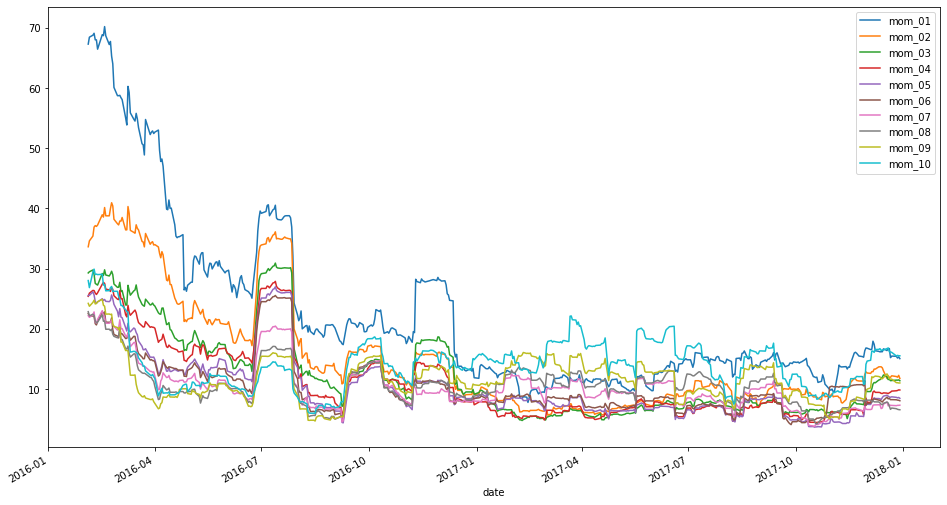

In [79]:
for i in range(ncols):
    for t in range(22,nobs):
        std_dev.iloc[t,i] = momentum.iloc[t-22:t,i].std()

ann_std_dev = 100 * np.sqrt(252) * std_dev
ann_std_dev.plot()


<AxesSubplot:xlabel='date'>

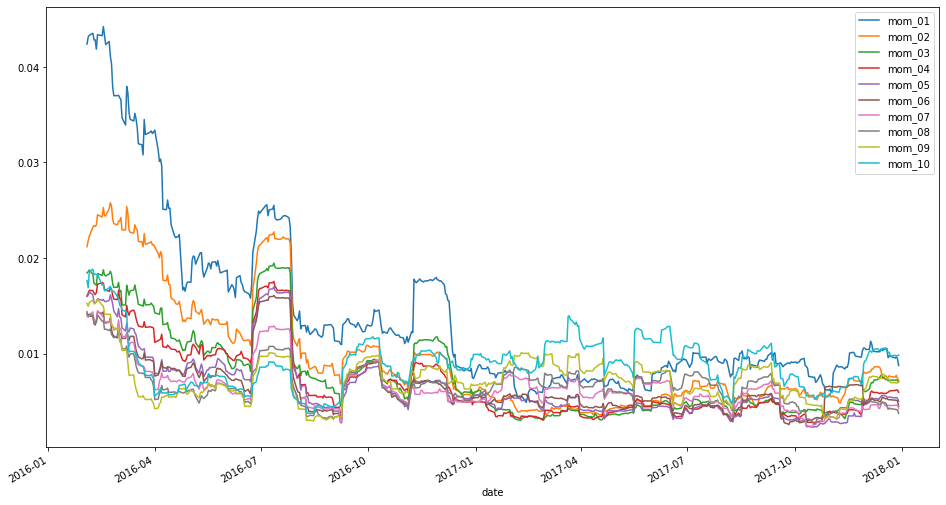

In [81]:
rolling_std_dev = momentum.rolling(22).std()
rolling_std_dev.plot()

## Exercises

### Exercise
1. Simulate a 1000 by 10 matrix consisting of 10 standard random walks using
   both nested loops and `np.cumsum`. 
2. Plot the results. 

**Question to think about**

If you rerun the code in this Exercise, do the results change? Why? 


### Exercise: Compute Drawdowns

Using the momentum data, compute the maximum drawdown over all
22-day consecutive periods defined as the smallest cumulative 
produce of the gross return (1+r) for 1, 2, .., 22 days.

Finally, compute the mean drawdown for each of the portfolios.

<AxesSubplot:>

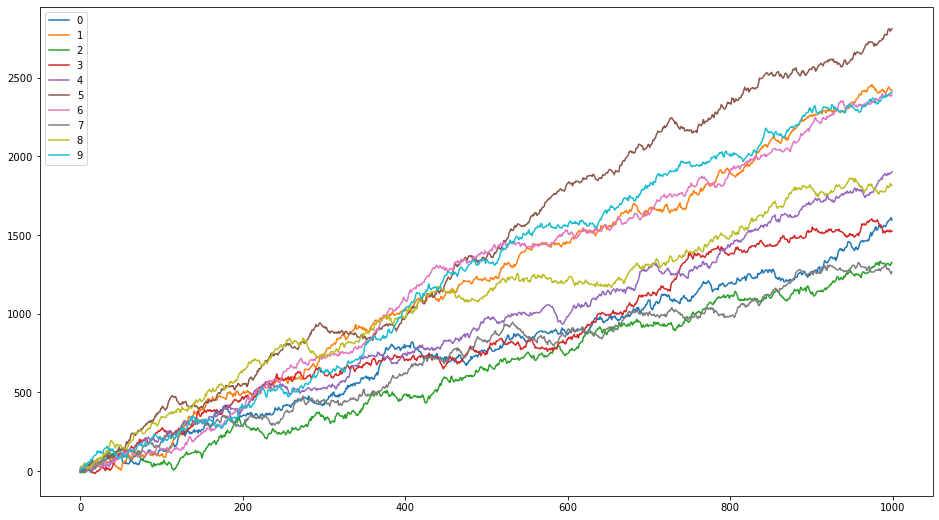

In [162]:
rdws = 1000
m = np.zeros((rdws,10))


for i in range(rdws):
    m[i] = np.random.normal(size=10,loc=2,scale=10)

p = pd.DataFrame(np.cumsum(m,axis=0))
p.plot()